# Holoviz for EELS training

TODO: view 2 eels channel at once?
TODO: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9330705/

## Load stuff

In [1]:
import psutil

# Get memory details
memory_info = psutil.virtual_memory()

# Print memory details
print(f"Total memory: {memory_info.total / (1024 ** 3):.2f} GB")
print(f"Available memory: {memory_info.available / (1024 ** 3):.2f} GB")
print(f"Used memory: {memory_info.used / (1024 ** 3):.2f} GB")
print(f"Free memory: {memory_info.free / (1024 ** 3):.2f} GB")
print(f"Memory percentage: {memory_info.percent}%")

Total memory: 503.72 GB
Available memory: 455.51 GB
Used memory: 44.88 GB
Free memory: 74.80 GB
Memory percentage: 9.6%


In [12]:
import sys
import glob
import os
sys.path.append('./../')
sys.path.append('./../../src/')
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import hyperspy.api as hs
import torch
import h5py
from ipywidgets import interact
from pprint import pprint
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")


# import nn
from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.viz.Movies import make_movie
from m3_learning.util.file_IO import download_and_unzip

from m3_learning.nn.STEM_AE_multimodal.Dataset import STEM_EELS_Dataset, EELS_Embedding_Dataset
from m3_learning.nn.STEM_AE_multimodal.Viz import Viz_EELS_hv
from m3_learning.nn.STEM_AE_multimodal import STEM_AE as stem

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
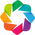

In [3]:
import functools
import holoviews as hv
from holoviews import opts
from holoviews.streams import Stream, Tap
import panel as pn

hv.extension('bokeh')
pn.extension('bokeh')

In [4]:
# Specify the filename and the path to save the file
save_path = './../../../../Northwestern_link/Northwestern_Multimodal'
fig_path = save_path + "_Figures/"

# builds the printer object
printing = printer(basepath=fig_path,fileformats=['png'])

# Set the style of the plots
set_style("printing")

# Set the random seed for reproducibility
random_seed(seed=42)

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


### Load data

In [5]:
dset = STEM_EELS_Dataset(save_path, ['kernel_sum','eels'],kernel_size=8,
                 EELS_roi={'LL':[(-31+15.5,274)], 'HL': [(501+15.5,807)]},
                 overwrite_eels=False,
                 overwrite_diff=False,)

fetching metadata...


  0%|          | 0/28 [00:00<?, ?it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

  4%|▎         | 1/28 [00:00<00:17,  1.51it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

  7%|▋         | 2/28 [00:01<00:13,  1.90it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 11%|█         | 3/28 [00:01<00:08,  2.93it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 14%|█▍        | 4/28 [00:01<00:06,  3.93it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 18%|█▊        | 5/28 [00:01<00:04,  4.84it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 21%|██▏       | 6/28 [00:01<00:03,  5.56it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 25%|██▌       | 7/28 [00:01<00:03,  6.15it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 29%|██▊       | 8/28 [00:01<00:03,  6.61it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 32%|███▏      | 9/28 [00:01<00:02,  6.96it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 36%|███▌      | 10/28 [00:02<00:02,  7.21it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 39%|███▉      | 11/28 [00:02<00:02,  7.39it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 43%|████▎     | 12/28 [00:02<00:02,  7.39it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 46%|████▋     | 13/28 [00:02<00:02,  7.47it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 50%|█████     | 14/28 [00:02<00:01,  7.60it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 54%|█████▎    | 15/28 [00:02<00:01,  7.67it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 57%|█████▋    | 16/28 [00:02<00:01,  7.71it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 61%|██████    | 17/28 [00:02<00:01,  7.77it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 64%|██████▍   | 18/28 [00:03<00:01,  7.75it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 68%|██████▊   | 19/28 [00:03<00:01,  7.69it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 71%|███████▏  | 20/28 [00:03<00:01,  7.74it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 75%|███████▌  | 21/28 [00:03<00:00,  7.90it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 79%|███████▊  | 22/28 [00:03<00:00,  7.87it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 82%|████████▏ | 23/28 [00:03<00:00,  7.90it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 86%|████████▌ | 24/28 [00:03<00:00,  7.91it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 89%|████████▉ | 25/28 [00:04<00:00,  7.90it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 93%|█████████▎| 26/28 [00:04<00:00,  7.80it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

 96%|█████████▋| 27/28 [00:04<00:00,  7.84it/s]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

100%|██████████| 28/28 [00:04<00:00,  6.37it/s]


28 valid samples

getting spectral axis labels...
finding High Loss background spectrum...


100%|██████████| 28/28 [00:08<00:00,  3.43it/s]


fitting eels scalers...


100%|██████████| 28/28 [00:14<00:00,  1.89it/s]

	EELS finished
done


In [6]:
# # we will need the means for visualization
# dset.write_means(overwrite_eels=False) # just do once

### Load model and embedding

In [7]:
model1D = stem.FitterAutoencoder_1D(function=stem.generate_pseudovoigt_1D,
                                 dset = dset,
                                 input_channels=dset.eels_chs,
                                 num_params=4,
                                 num_fits=96,
                                 limits=[1,dset.spec_len, dset.spec_len], # A, mean, fwhm 
                                 # TODO: do I have to change x axis so mean and fwhm aren't too different from the rest?
                                 device='cuda:0',
                                 flatten_from = 1,
                                 learning_rate = 3e-5,
                                 folder='/home/m3learning/Northwestern/Northwestern_link/Northwestern_Multimodal_Checkpoints/coef1_scaled_maximize_A'
                            )

# checkpoint = '/home/m3learning/Northwestern/m3_learning/m3_learning/papers/Multimodal/save_folder/(2024-08-22)_epoch:0010_l1coef:0.0050_lr:0.00003_trainloss:0.0097.pkl'

# model1D.load_weights(checkpoint)

In [9]:
# model1D.checkpoint = model1D.folder + f'/(2024-08-28)_' +\
#     f'epoch:{10:04d}_l1coef:{1e-1:.4f}'+f'_lr:{model1D.learning_rate}' +\
#     f'_trainloss:inf.pkl'
# model1D.save_checkpoint(10,
#                         train_loss='inf',
#                         coef_1=1e-1, 
#                         coef_2=0,
#                         coef_3=0,
#                         ln_parm=2)

In [10]:
# optional train
model1D.Train( dset, batch_size=128, coef_1=1e-1, with_scheduler=False )

  0%|          | 0/3670 [00:00<?, ?it/s]

  0%|          | 2/3670 [00:03<1:46:33,  1.74s/it]


KeyboardInterrupt: 

In [8]:
# load old embedding
checkpoint = '/home/m3learning/Northwestern/Northwestern_link/Northwestern_Multimodal_Checkpoints/coef1_scaled_maximize_A/(2024-08-29)_epoch:0024_l1coef:0.0000_lr:0.00003_trainloss:0.0095.pkl'


model1D.load_weights(checkpoint)

[Errno 2] Unable to open file (unable to open file: name = '/home/m3learning/Northwestern/Northwestern_link/Northwestern_Multimodal_Checkpoints/coef1_scaled_maximize_A/./embeddings_1D.h5', errno = 2, error message = 'No such file or directory', flags = 1, o_flags = 2)
Embeddings not opened
[Errno 2] Unable to open file (unable to open file: name = '/home/m3learning/Northwestern/Northwestern_link/Northwestern_Multimodal_Checkpoints/coef1_scaled_maximize_A/./embeddings_1D.h5', errno = 2, error message = 'No such file or directory', flags = 1, o_flags = 2)
Generated not opened


In [9]:
# you only need to write the embeddings one time
embedding_ = model1D.get_embedding(dset,train=False)

  4%|▎         | 533/14679 [00:33<14:43, 16.01it/s]


KeyboardInterrupt: 

In [10]:
embedding = EELS_Embedding_Dataset(dset,model1D)

## Viewing input data

In [ ]:
hv_viz = Viz_EELS_hv( dset, model1D, embedding,save_path, printing)

In [ ]:
import time

# Profiling decorator
def profile(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"{func.__name__} took {end_time - start_time:.4f} seconds")
        return result
    return wrapper

In [ ]:
# image_bounds = (0, 120, 120, 0) #(left, bottom, right, top)

particle_dict = {k:v for v,k in enumerate(dset.meta['particle_list'])}

# Define a parameter with a list of possible values for p
p_select = pn.widgets.Select(name='Particle', options=particle_dict)  # Replace with actual options
e_select = pn.widgets.Select(name='EELS Channel', options=[k for k in range(dset.eels_chs)])  # Replace with actual options

In @functools.lru_cache( ... ), you can put the number of particles you want to store in cache. loading a new particle takes significant time m(maybe 15+ s), so it is best to save as many as your cache can handle.

In [ ]:
# Cache the data retrieval
# @profile
@functools.lru_cache(len(dset.meta['particle_list']))
def _update_data(p): 
    _, eels = dset[dset.meta['particle_inds'][p]:dset.meta['particle_inds'][p+1]]
    return eels

def update_data(p, e, **kwargs): 
    return _update_data(p)[:,e]

In [ ]:
# update mean image/spec
# @profile
def update_mean_image(p,e, **kwargs): 
    title = f"Mean image {dset.meta['particle_list'][p]}"
    return hv.Image(dset.get_mean_image(p,e), bounds=((0,0,)+dset.meta['shape_list'][p])
                    ).opts(width=350, height=300, cmap='viridis', colorbar=True, tools=[], 
                            axiswise=True, shared_axes=False, title=title)

In [25]:
# @profile
def update_mean_spectrum(p,e, **kwargs):
    mean_spectrum = update_data(p,e).mean(axis=0)
    return hv.Curve(mean_spectrum
                    ).opts(tools=['tap'], 
                            axiswise=True, shared_axes=False, title='Mean Spectrum')

#### view

In [17]:
mean_image_dmap = hv.DynamicMap(pn.bind(update_mean_image, p=p_select, e=e_select)
                        ).opts(width=350, height=300, cmap='viridis', colorbar=True, 
                                axiswise=True, shared_axes=False)
mean_spectrum_dmap = hv.DynamicMap(pn.bind(update_mean_spectrum, p=p_select, e=e_select)
                        ).opts(axiswise=True, shared_axes=False)

# make sure the selectors are present
s3 = pn.Column( pn.Row(p_select, e_select,),
          mean_image_dmap+mean_spectrum_dmap).servable()
s3

BokehModel(combine_events=True, render_bundle={'docs_json': {'338d2b4a-2334-46f7-9186-69d6d0eca2fe': {'version…

In [18]:
s3.clear()

In [19]:
# update main frames
def update_frame(p,e, x, **kwargs): 
    title = f"Frame at: {int(x)}"
    return hv.Image( update_data(p,e)[:, int(x)].reshape(dset.meta['shape_list'][p]),
                     bounds=((0,0,)+dset.meta['shape_list'][p])).opts(axiswise=0, title=title)
def update_spec(p,e, x, y, **kwargs): 
    title = f"Spec at: ({int(x)},{int(y)})"
    return hv.Curve( update_data(p,e).reshape(dset.meta['shape_list'][p]+(-1,))[int(x), int(y), :]).opts(axiswise=0, title=title)

In [20]:
# Streams to handle tap events
point_stream = Tap(source=mean_image_dmap, x=0, y=0) # w
spectrum_stream = Tap(source=mean_spectrum_dmap, x=0) # a,b

# plot selected image/spectrum 
frame_dmap = hv.DynamicMap(pn.bind(update_frame, p=p_select, e=e_select), streams=[spectrum_stream]
                        ).opts(width=350, height=300, cmap='viridis', colorbar=True, 
                                axiswise=True, shared_axes=False)

spec_dmap = hv.DynamicMap(pn.bind(update_spec, p=p_select, e=e_select), streams=[point_stream]
                        ).opts(axiswise=True, shared_axes=False)

In [21]:
# update dot 
def show_red_dot_image(x, y): return hv.Scatter([(x, y)]
                                               ).opts(xlim=(0, 120), ylim=(0, 120), color='red', size=10, marker='o',
                                                      axiswise=0, shared_axes=False)
def show_red_dot_spectrum(x,y): return hv.VLine(x).opts(xlim=(0, 969), ylim=(0, 1), color='red',
                                                        axiswise=0, shared_axes=False)

In [22]:
def show_vline(x, y): 
    return hv.VLine(int(x)).opts(xlim=(0, dset.spec_len), ylim=(0, 1), color='red',
                                 axiswise=False, shared_axes=False)
def show_dot(p, x, y): 
    return hv.Scatter([(int(x), int(y))]).opts(xlim=(0, dset.meta['shape_list'][p][0]), 
                                               ylim=(0, dset.meta['shape_list'][p][1]), 
                                               color='red', size=10, marker='o',
                                               axiswise=False, shared_axes=False)

dot_overlay = hv.DynamicMap(pn.bind(show_dot, p=p_select), streams=[point_stream]
                           ).opts(axiswise=False, shared_axes=False)
vline_overlay = hv.DynamicMap(show_vline, streams=[spectrum_stream]
                                    ).opts(xlim=(0, dset.spec_len), ylim=(0, 1), 
                                            axiswise=False, shared_axes=False)


In [ ]:
processed_panel = pn.Column( pn.Row(p_select, e_select,),
                            ( (mean_image_dmap*dot_overlay).opts(axiswise=True) + \
                              (mean_spectrum_dmap*vline_overlay).opts(axiswise=True) ),
                            ( (frame_dmap*dot_overlay).opts(axiswise=True) + \
                              (spec_dmap*vline_overlay).opts(axiswise=True) ) )
processed_panel


BokehModel(combine_events=True, render_bundle={'docs_json': {'644ce7f9-3c25-40ef-9ec8-b87308709c46': {'version…

In [106]:
processed_panel.clear()

## Viewing fits and parameters
* have 2 axis on spectrum: left for orig and fit, right to each individual peak. you can use overlay ( * ) to avoid having to reload every time
* have 6 axis for parameters and histograms
* convert stream to links?

In [26]:
# when training with coef gradient
coef1_scale = np.linspace(0,1e-1,model1D.num_fits)

### viewer for mean embedding and parameters

In [27]:
@functools.lru_cache(len(dset.meta['particle_list']))
def _update_emb(p): 
    return embedding[dset.meta['particle_inds'][p]:dset.meta['particle_inds'][p+1]] 
    # (14400,2,96,6), (14400,2,96,969) 

def update_emb(p, e, **kwargs): 
    emb,fits =  _update_emb(p)
    return emb[:,e], fits[:,e] 
    # (14400,96,6), (14400,96,969) 

In [28]:
# functions to graph fits and particles
def graph_fits(p,e,x=0,y=0):
    _,fits = update_emb(p,e) # (14400,96,969) 
    orig = update_data(p,e)
    idx = np.ravel_multi_index((int(x),int(y)),(dset.meta['shape_list'][p]))
    fits = hv.Curve(fits[idx].sum(axis=0)).opts(axiswise=True, shared_axes=False,color='red')
    eels = hv.Curve(orig[idx]).opts(axiswise=True, shared_axes=False, color='blue', 
                                    tools=['tap'], title=f'Raw and fitted Spectra ({int(x)},{int(y)})')
    return (eels*fits)

def graph_particles(p,e,x=0,**kwargs):
    _,fits = update_emb(p,e) # (14400,96,969)
    return hv.Image(fits[:,:,int(x)].sum(1).reshape(dset.meta['shape_list'][p]), bounds=(0,0)+dset.meta['shape_list'][p]
                    ).opts(width=350, height=300, cmap='viridis', colorbar=True, tools=['tap'], 
                            axiswise=True, shared_axes=False, title=f'Fitted Frame {int(x)}, coef1: {coef1_scale[p]:.2f}')

In [29]:
def blank_img(p): return hv.Image(np.zeros(dset.meta['shape_list'][p])
                          ).opts(tools=['tap'], axiswise=True, shared_axes=False)
blank_emb = hv.DynamicMap( pn.bind(blank_img, p=p_select) )
blank_spec = hv.Curve( np.zeros(dset.spec_len)
                          ).opts(tools=['tap'], axiswise=True, shared_axes=False)

# Create the streams
spectrum_stream = Tap(source=blank_spec, x=0)                
point_stream = Tap(source=blank_emb, x=0, y=0)

def show_vline(x, y): 
    return hv.VLine(int(x)).opts(xlim=(0, dset.spec_len), ylim=(0, 1), color='red',
                                 axiswise=False, shared_axes=False)
def show_dot(p, x, y): 
    return hv.Scatter([(int(x), int(y))]).opts(xlim=(0, dset.meta['shape_list'][p][0]), 
                                               ylim=(0, dset.meta['shape_list'][p][1]), 
                                               color='red', size=10, marker='o',
                                               axiswise=False, shared_axes=False)
    
dot_overlay = hv.DynamicMap(pn.bind(show_dot, p=p_select), streams=[point_stream]
                           ).opts(axiswise=False, shared_axes=False)
vline_overlay = hv.DynamicMap(show_vline, streams=[spectrum_stream]
                                    ).opts(xlim=(0, dset.spec_len), ylim=(0, 1), 
                                            axiswise=False, shared_axes=False)

# Plot image/spectrum
emb_dmap = hv.DynamicMap(pn.bind(graph_particles, p=p_select, e=e_select), streams=[spectrum_stream]
                        ).opts(width=350, height=300, cmap='viridis', colorbar=True,
                                axiswise=False, shared_axes=False, tools=['tap'])
fits_dmap = hv.DynamicMap(pn.bind(graph_fits, p=p_select, e=e_select), streams=[point_stream]
                        ).opts(axiswise=False, shared_axes=False, tools=['tap'])

In [30]:
# par_labels = [ 'A_g', 'x', 'sigma', 'A_l', 'gamma', 'nu']
# par_labels = [ 'A', 'Ib', 'x', 'w', 'nu']
par_labels = [ 'A', 'x', 'w', 'nu']

def graph_parameters(p,e,x,y,par,**kwargs):
    emb,_ = update_emb(p,e) # (14400,96,969)
    if par==0 or par==3: mean_par = emb[:,:,par].sum(1)
    else: mean_par = emb[:,:,par].mean(1)
    idx = np.ravel_multi_index((int(x), int(y)),dset.meta['shape_list'][p])
    return hv.Image(mean_par.reshape(dset.meta['shape_list'][p]), bounds=(0,0)+dset.meta['shape_list'][p]
                    ).opts(colorbar=True,clim=(mean_par.min(),mean_par.max()),
                           axiswise=True, shared_axes=False, title=f'{par_labels[par]}: {mean_par[idx]:.3e}' ) 

In [31]:
parameter_dmaps = [ dot_overlay*hv.DynamicMap( pn.bind(graph_parameters, p=p_select, e=e_select, par=par), 
                                              streams=[point_stream]
                                            ).opts(width=250, height=200, cmap='viridis', 
                                            colorbar_opts={'width': 5},
                                axiswise=False, shared_axes=False )\
            for par in list(range(model1D.num_params)) ]

#### view

In [58]:
mean_parameters_panel = pn.Column(pn.Row(p_select, e_select),
          (blank_emb*emb_dmap*dot_overlay).opts(axiswise=True) +\
          (blank_spec*fits_dmap*vline_overlay).opts(axiswise=True),
          hv.Layout( [dot_overlay*dmap for dmap in parameter_dmaps] ).cols(3) )

mean_parameters_panel
# kinda meaningless with l1 coef scaling across channels

BokehModel(combine_events=True, render_bundle={'docs_json': {'c83f338c-d472-473a-9c88-917de867c870': {'version…

In [102]:
mean_parameters_panel.clear()

### viewer for fits and parameters at particular channel

In [28]:
# might take a while 
active_channels, sparse_channels = embedding.get_threshold_channels(active_limit=.25, sparse_limit=.1)
active_channels,sparse_channels

(array([ 2,  4,  5,  8,  9, 14, 16, 21, 28, 32, 33, 38, 39, 40, 46, 58, 59,
        63, 64, 69, 70, 71, 76, 89, 93, 94]),
 array([ 3, 15, 22, 27, 29, 34, 45, 47, 51, 56, 75, 77, 80, 81, 82, 83, 87,
        92]))

In [32]:
# choose whether you want the channel_slider to include the active_channels or the sparse channels
# channels = list(active_channels)
# c_select = pn.widgets.DiscreteSlider(name='Emb Channel', value=channels[0], options=channels)  # Replace with actual options
c_select = pn.widgets.IntSlider(value=0, start=0, end=model1D.num_fits)

def update_emb_channel(p,e,c,**kwargs):
    emb,fits = update_emb(p,e)
    return emb[:,c],fits[:,c] 
    # (14400,6), (14400,969) 

In [33]:
# functions to graph fits and particles
def graph_fits(p,e,c,x=0,y=0):
    idx = np.ravel_multi_index((int(x),int(y)),(dset.meta['shape_list'][p]))
    _,fits = update_emb_channel(p,e,c) # (14400,96,969) 
    fits=fits[idx]
    orig = update_data(p,e)[idx]
    # orig=orig/orig.max()*fits.max() # scaled
    fits = hv.Curve(fits).opts(axiswise=True, shared_axes=False,color='red')
    eels = hv.Curve(orig).opts(axiswise=True, shared_axes=False, color='blue', 
                                    tools=['tap'], title=f'Raw and fitted Spectra ({int(x)},{int(y)})')
    return (eels*fits)

def graph_particles(p,e,c,x=0,**kwargs):
    _,fits = update_emb_channel(p,e,c) # (14400,96,969)
    fits = fits[:,int(x)]
    return hv.Image(fits.reshape(dset.meta['shape_list'][p]), bounds=(0,0)+dset.meta['shape_list'][p]
                    ).opts(width=350, height=300, tools=['tap'], 
                           cmap='viridis', colorbar=True, clim=(fits.min(),fits.max()),
                            axiswise=True, shared_axes=False, 
                            title=f'Fitted Frame {int(x)}, Channel {c}, coef: {coef1_scale[c]:.22}')

In [34]:
# Plot image/spectrum
emb_dmap = hv.DynamicMap(pn.bind(graph_particles, p=p_select, e=e_select, c=c_select), streams=[spectrum_stream]
                        ).opts(width=350, height=300, cmap='viridis', colorbar=True, colorbar_opts={'width': 10},
                                axiswise=False, shared_axes=False, tools=['tap'])
fits_dmap = hv.DynamicMap(pn.bind(graph_fits, p=p_select, e=e_select, c=c_select), streams=[point_stream]
                        ).opts(axiswise=False, shared_axes=False, tools=['tap'])

In [35]:
# pars = [ 'A_g', 'x', 'sigma', 'A_l', 'gamma', 'nu']
# par_labels = [ 'A', 'Ib', 'x', 'w', 'nu']

def graph_parameters(p,e,c,x,y,par,**kwargs):
    idx = np.ravel_multi_index((int(x), int(y)),dset.meta['shape_list'][p])
    emb,_ = update_emb_channel(p,e,c) # (14400,969)
    emb = emb[:,par]
    # mean_par = emb[:,:,par].mean(1)
    return hv.Image(emb.reshape(dset.meta['shape_list'][p]), bounds=(0,0)+dset.meta['shape_list'][p]
                    ).opts(colorbar=True,clim=(emb.min(),emb.max()),
                           axiswise=True, shared_axes=False, title=f'{par_labels[par]}: {emb[idx]:.3e}' ) 

In [36]:
parameter_dmaps = [ dot_overlay*hv.DynamicMap( pn.bind(graph_parameters, p=p_select, e=e_select, c=c_select, par=par), 
                                              streams=[point_stream]
                                            ).opts(width=250, height=200, cmap='viridis', 
                                            colorbar_opts={'width': 5},
                                axiswise=False, shared_axes=False )\
            for par in list(range(model1D.num_params)) ]

In [37]:
parameter_dmaps_by_channel = pn.Column(pn.Row(p_select, e_select,c_select),
          (blank_emb*emb_dmap*dot_overlay).opts(axiswise=True) +\
          (blank_spec*fits_dmap*vline_overlay).opts(axiswise=True),
          hv.Layout( [dot_overlay*dmap for dmap in parameter_dmaps] ).cols(2) )

parameter_dmaps_by_channel

BokehModel(combine_events=True, render_bundle={'docs_json': {'3bc60011-9194-42bc-9038-3a9a278b8449': {'version…

Invoked as wrapped(x=0, y=None, p=0, e=1, c=96)
Invoked as dynamic_operation(x=0, y=None, p=0, e=1, c=96)
Invoked as wrapped(x=43.62876694777916, y=91.48129111842105, p=0, e=1, c=96)
Invoked as dynamic_operation(x=43.62876694777916, y=91.48129111842105, p=0, e=1, c=96)
Invoked as wrapped(x=43.62876694777916, y=91.48129111842105, p=0, e=1, c=96)
Invoked as dynamic_operation(x=43.62876694777916, y=91.48129111842105, p=0, e=1, c=96)
Invoked as wrapped(x=43.62876694777916, y=91.48129111842105, p=0, e=1, c=96)
Invoked as dynamic_operation(x=43.62876694777916, y=91.48129111842105, p=0, e=1, c=96)
Invoked as wrapped(x=43.62876694777916, y=91.48129111842105, p=0, e=1, c=96)
Invoked as dynamic_operation(x=43.62876694777916, y=91.48129111842105, p=0, e=1, c=96)
Invoked as wrapped(x=43.62876694777916, y=91.48129111842105, p=0, e=1, c=96)
Invoked as dynamic_operation(x=43.62876694777916, y=91.48129111842105, p=0, e=1, c=96)
Invoked as wrapped(x=43.62876694777916, y=91.48129111842105, p=0, e=1, c=9

Traceback (most recent call last):
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/site-packages/holoviews/plotting/util.py", line 279, in get_plot_frame
    return map_obj[key]
           ~~~~~~~^^^^^
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/site-packages/holoviews/core/spaces.py", line 1212, in __getitem__
    val = self._execute_callback(*tuple_key)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/site-packages/holoviews/core/spaces.py", line 979, in _execute_callback
    retval = self.callback(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/m3learning/anaconda3/envs/northwestern/lib/python3.11/site-packages/holoviews/core/spaces.py", line 549, in __call__
    if not args and not kwargs and not any(kwarg_hash): return self.callable()
                                                               ^^^^^^^^^^^^^^^
  File "/home/m3learning/anaconda3/e

In [136]:
parameter_dmaps_by_channel.clear()

In [51]:
fake_data = torch.Tensor([[1,0.1,500,100,0.25],[1,0.1,500,100,0.75]])
fake_data.shape

torch.Size([2, 5])

In [52]:
test = stem.generate_pseudovoigt_1D( fake_data.unsqueeze(0), dset )

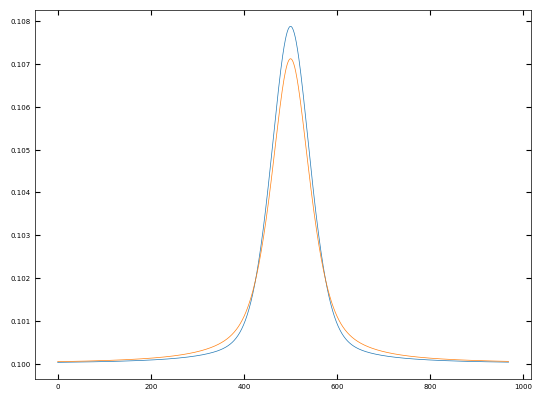

In [53]:
plt.plot(test[0,0])
plt.plot(test[0,1])

In [47]:
test.shape

torch.Size([1, 2, 969])